In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA



# Load dataset
file_path = "/content/sample_data/US_emissions.xlsx"
df = pd.read_excel(file_path)

# Display first few rows
print(df.head())

# Check column names
print(df.columns)


   year   parent_entity Stock Ticker  US_Company             parent_type  \
0  2023            CEIX         ARCH           1  Investor-owned Company   
1  2023  Arch Resources         ARCH           1  Investor-owned Company   
2  2023  Arch Resources         ARCH           1  Investor-owned Company   
3  2022  Arch Resources         ARCH           1  Investor-owned Company   
4  2022  Arch Resources         ARCH           1  Investor-owned Company   

  reporting_entity            commodity  production_value    production_unit  \
0   Arch Resources   Metallurgical Coal          8.436905  Million tonnes/yr   
1   Arch Resources         Thermal Coal          2.630863  Million tonnes/yr   
2   Arch Resources  Sub-Bituminous Coal         56.971786  Million tonnes/yr   
3   Arch Resources   Metallurgical Coal          7.076114  Million tonnes/yr   
4   Arch Resources         Thermal Coal          3.900934  Million tonnes/yr   

   product_emissions_MtCO2  flaring_emissions_MtCO2  venting_e

In [ ]:
df = df[['year', 'parent_entity', 'total_emissions_MtCO2e']]

# Filter data for years 2000-2050 (historical)
df = df[(df['year'] >= 2000)]

# Identify top 5 emitting companies based on total emissions
top_emitters = df.groupby("parent_entity")["total_emissions_MtCO2e"].sum().nlargest(5)

# Print the top 5 emitting companies
print("Top 5 Emitting Companies):")
print(top_emitters)

Top 5 Emitting Companies):
parent_entity
Chevron                          11429.652212
Peabody Energy                   10535.876905
ConocoPhillips                    6856.582116
Arch Resources                    5647.972672
Alpha Metallurgical Resources     4894.818306
Name: total_emissions_MtCO2e, dtype: float64


In [ ]:
# Standardize parent entity names (strip spaces and lowercase)
df['parent_entity'] = df['parent_entity'].str.strip().str.lower()

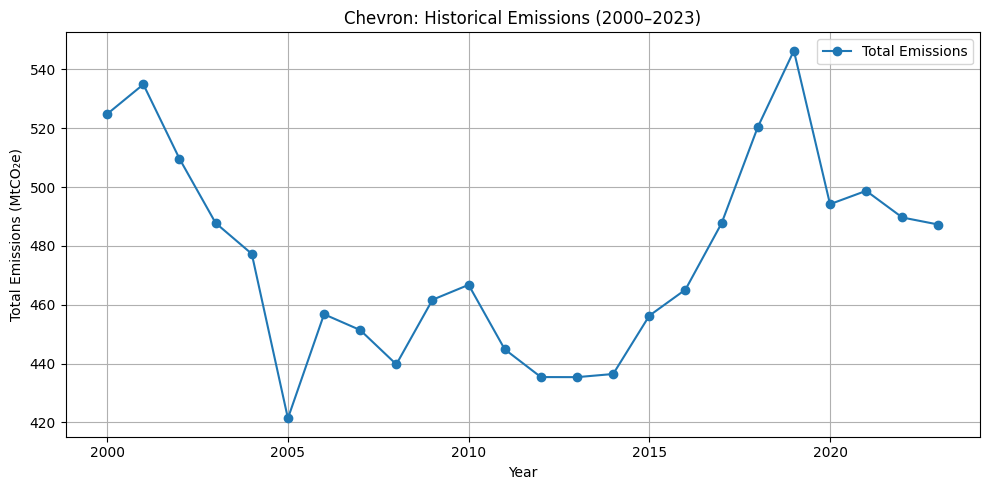

In [ ]:
# Filter for Chevron's data from 2000-2023
chevron_data = df[(df['parent_entity'] == "chevron") & (df['year'] >= 2000) & (df['year'] <= 2023)]
chevron_annual = chevron_data.groupby('year')['total_emissions_MtCO2e'].sum().reset_index()

# Plot historical trend
plt.figure(figsize=(10, 5))
plt.plot(chevron_annual['year'], chevron_annual['total_emissions_MtCO2e'], marker='o', label='Total Emissions')
plt.title('Chevron: Historical Emissions (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO₂e)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Use the grouped Chevron emissions data (chevron_annual from historical plot)
chevron_annual.set_index('year', inplace=True)

# Fit ARIMA model (adjust order as needed)
model = ARIMA(chevron_annual['total_emissions_MtCO2e'], order=(2,1,2))  # (p,d,q) can be tuned
model_fit = model.fit()

# Forecast for 2024-2050
forecast_years = np.arange(2024, 2051)
forecast_values = model_fit.forecast(steps=len(forecast_years))

# Convert to DataFrame for easy viewing
forecast_df = pd.DataFrame({'year': forecast_years, 'forecasted_emissions': forecast_values})

# Combine historical & forecasted values for comparison
combined_df = pd.concat([chevron_annual.reset_index(), forecast_df], axis=0)

# Display combined historical & forecasted values
print(combined_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


    year  total_emissions_MtCO2e  forecasted_emissions
0   2000              524.823400                   NaN
1   2001              534.891513                   NaN
2   2002              509.607369                   NaN
3   2003              487.762466                   NaN
4   2004              477.289120                   NaN
5   2005              421.377611                   NaN
6   2006              456.760536                   NaN
7   2007              451.386604                   NaN
8   2008              439.729453                   NaN
9   2009              461.679382                   NaN
10  2010              466.752340                   NaN
11  2011              444.834728                   NaN
12  2012              435.404311                   NaN
13  2013              435.379542                   NaN
14  2014              436.449273                   NaN
15  2015              456.269306                   NaN
16  2016              465.133487                   NaN
17  2017  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

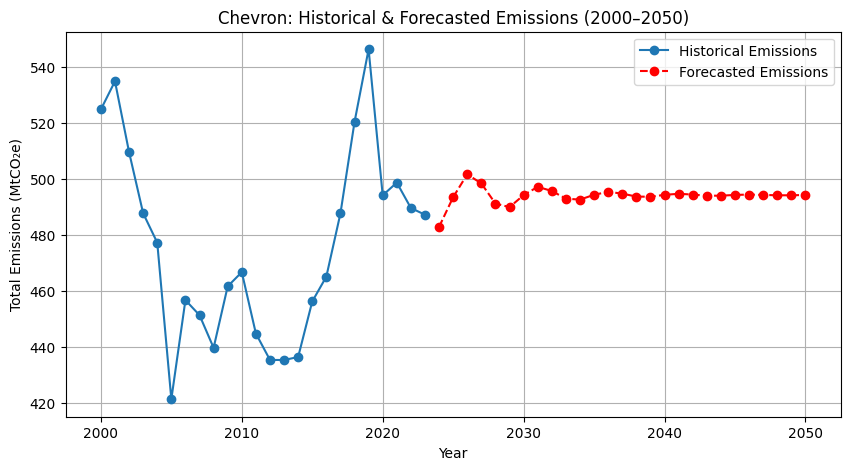

In [ ]:


# Fit ARIMA model (order=(1,1,1) for simplicity)
model = ARIMA(chevron_annual['total_emissions_MtCO2e'], order=(2,1,2))
model_fit = model.fit()

# Forecast for 2024-2050
forecast_years = np.arange(2024, 2051)
forecast_values = model_fit.forecast(steps=len(forecast_years))

# Convert to DataFrame
forecast_df = pd.DataFrame({'year': forecast_years, 'forecasted_emissions': forecast_values})

# Reset index for plotting
chevron_annual_reset = chevron_annual.reset_index()

# Plot historical and forecasted emissions
plt.figure(figsize=(10, 5))
plt.plot(chevron_annual_reset['year'], chevron_annual_reset['total_emissions_MtCO2e'], marker='o', label='Historical Emissions')
plt.plot(forecast_df['year'], forecast_df['forecasted_emissions'], marker='o', linestyle='dashed', color='red', label='Forecasted Emissions')

# Formatting
plt.title('Chevron: Historical & Forecasted Emissions (2000–2050)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO₂e)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# --- Net-Zero Comparison ---
# Net-Zero Goal Assumption: 100% reduction by 2050
net_zero_target = 0  # Ideal target for 2050
emission_reduction_percentage_by_2030 = 50  # Assumed 50% reduction by 2030 for comparison
emission_reduction_percentage_by_2040 = 80  # Assumed 80% reduction by 2040

# Create a Net-Zero trajectory based on the assumptions
net_zero_trajectory = pd.DataFrame({
    'year': forecast_years,
    'net_zero_target': np.linspace(chevron_annual['total_emissions_MtCO2e'].iloc[-1], net_zero_target, len(forecast_years))
})

# Compare the projected emissions with the net-zero trajectory
comparison_df = pd.merge(forecast_df, net_zero_trajectory, on='year')

# Display and compare emissions with net-zero trajectory
print("\nComparison of Projected Emissions with Net-Zero Goal (2050 For Chevron):")
for year in comparison_df['year']:
    projected = comparison_df[comparison_df['year'] == year]['forecasted_emissions'].values[0]
    net_zero = comparison_df[comparison_df['year'] == year]['net_zero_target'].values[0]

    if projected > net_zero:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (Above Net-Zero Target)")
    elif projected == net_zero:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (On Target for Net-Zero)")
    else:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (Below Net-Zero Target)")


Comparison of Projected Emissions with Net-Zero Goal (2050 For Chevron):
Year 2024: Projected Emissions = 482.89 MtCO₂e, Net-Zero Target = 487.24 MtCO₂e (Below Net-Zero Target)
Year 2025: Projected Emissions = 493.51 MtCO₂e, Net-Zero Target = 468.50 MtCO₂e (Above Net-Zero Target)
Year 2026: Projected Emissions = 501.68 MtCO₂e, Net-Zero Target = 449.76 MtCO₂e (Above Net-Zero Target)
Year 2027: Projected Emissions = 498.41 MtCO₂e, Net-Zero Target = 431.02 MtCO₂e (Above Net-Zero Target)
Year 2028: Projected Emissions = 491.24 MtCO₂e, Net-Zero Target = 412.28 MtCO₂e (Above Net-Zero Target)
Year 2029: Projected Emissions = 489.96 MtCO₂e, Net-Zero Target = 393.54 MtCO₂e (Above Net-Zero Target)
Year 2030: Projected Emissions = 494.23 MtCO₂e, Net-Zero Target = 374.80 MtCO₂e (Above Net-Zero Target)
Year 2031: Projected Emissions = 497.20 MtCO₂e, Net-Zero Target = 356.06 MtCO₂e (Above Net-Zero Target)
Year 2032: Projected Emissions = 495.73 MtCO₂e, Net-Zero Target = 337.32 MtCO₂e (Above Net-Zer

In [ ]:
# Combine historical data (2000-2023) and forecasted data (2024-2050)
combined_df = pd.concat([chevron_annual.reset_index(), forecast_df], axis=0)

# Display the combined DataFrame (historical + forecasted)
print("Combined Historical and Forecasted Emissions:")
print(combined_df)

# For comparison, display just the historical values (2000-2023) vs forecasted (2024-2050)
historical_data = chevron_annual.reset_index()
historical_data = historical_data[historical_data['year'] <= 2023]
forecast_comparison_df = pd.concat([historical_data.set_index('year')['total_emissions_MtCO2e'],
                                    forecast_df.set_index('year')['forecasted_emissions']],
                                   axis=1)
forecast_comparison_df.columns = ['Historical Emissions (2000-2023)', 'Forecasted Emissions (2024-2050)']

# Display comparison data as sentences
print("\nComparison of Historical vs. Forecasted Emissions for Chevron:")

# Display and compare last historical value (2023) with first forecast value (2024)
historical_last_year = historical_data[historical_data['year'] == 2023]
forecast_first_year = forecast_df[forecast_df['year'] == 2024]
forecast_last_year = forecast_df[forecast_df['year'] == 2050]

print(f"\nLast historical emission in 2023: {historical_last_year['total_emissions_MtCO2e'].values[0]:.2f} MtCO2e")
print(f"First forecasted emission in 2024: {forecast_first_year['forecasted_emissions'].values[0]:.2f} MtCO2e")
print(f"Forecasted emission in 2050: {forecast_last_year['forecasted_emissions'].values[0]:.2f} MtCO2e")

# Compare the trend (for example: from the first historical value to the forecasted values in 2024)
historical_first_year = historical_data.iloc[0]
print(f"\nFirst historical emission in 2000: {historical_first_year['total_emissions_MtCO2e']:.2f} MtCO2e")


# Display the comparison as sentences for a few years
for i in range(2024, 2031):  # Compare first 7 years of forecast (2024-2030)
    historical_value = historical_data[historical_data['year'] == i]
    forecast_value = forecast_df[forecast_df['year'] == i]
    if not historical_value.empty:
        print(f"\nEmissions in {i}: Historical = {historical_value['total_emissions_MtCO2e'].values[0]:.2f} MtCO2e, "
              f"Forecasted = {forecast_value['forecasted_emissions'].values[0]:.2f} MtCO2e")



Combined Historical and Forecasted Emissions:
    year  total_emissions_MtCO2e  forecasted_emissions
0   2000              524.823400                   NaN
1   2001              534.891513                   NaN
2   2002              509.607369                   NaN
3   2003              487.762466                   NaN
4   2004              477.289120                   NaN
5   2005              421.377611                   NaN
6   2006              456.760536                   NaN
7   2007              451.386604                   NaN
8   2008              439.729453                   NaN
9   2009              461.679382                   NaN
10  2010              466.752340                   NaN
11  2011              444.834728                   NaN
12  2012              435.404311                   NaN
13  2013              435.379542                   NaN
14  2014              436.449273                   NaN
15  2015              456.269306                   NaN
16  2016           

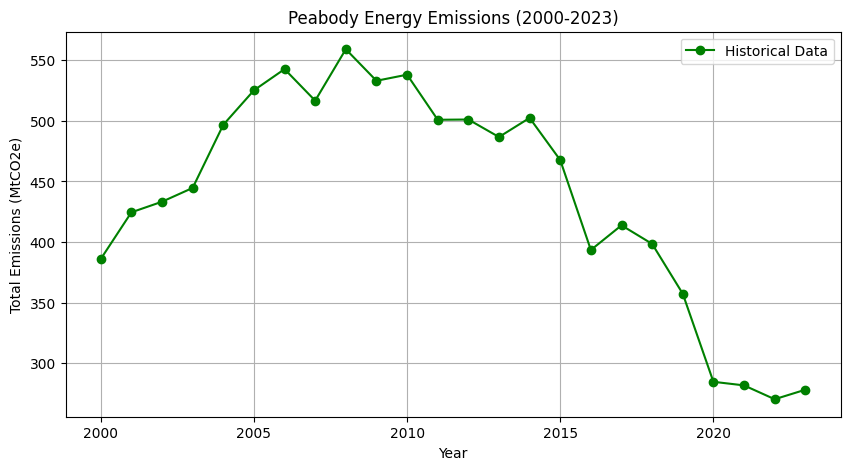

In [ ]:
peabody_data = df[(df['parent_entity'] == "peabody energy") & (df['year'] >= 2000) & (df['year'] <= 2023)]
peabody_annual = peabody_data.groupby('year')['total_emissions_MtCO2e'].sum().reset_index()
# Plot historical emissions

plt.figure(figsize=(10, 5))
plt.plot(peabody_annual['year'], peabody_annual['total_emissions_MtCO2e'], marker="o", color="green", label="Historical Data")

plt.title("Peabody Energy Emissions (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Total Emissions (MtCO2e)")
plt.legend()
plt.grid(True)
plt.show()


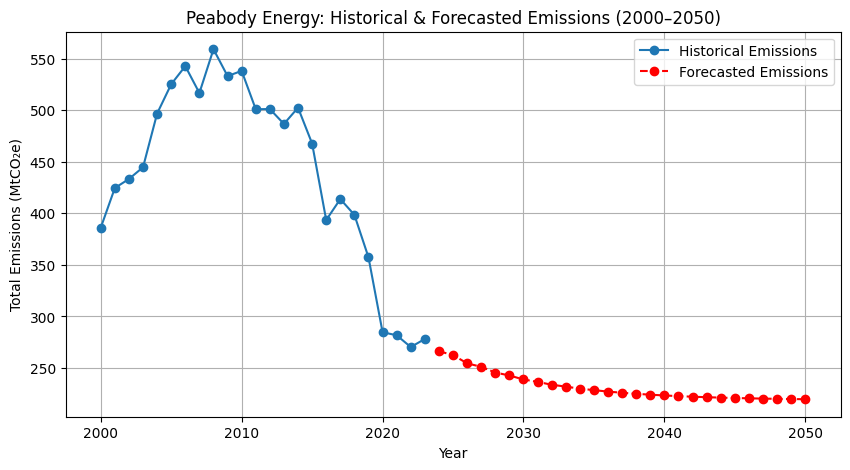

In [ ]:
# Fit ARIMA model (order=(1,1,1) for simplicity)
model = ARIMA(peabody_annual['total_emissions_MtCO2e'], order=(2,1,2))
model_fit = model.fit()

# Forecast for 2024-2050
forecast_years = np.arange(2024, 2051)
forecast_values = model_fit.forecast(steps=len(forecast_years))

# Convert to DataFrame
forecast_df = pd.DataFrame({'year': forecast_years, 'forecasted_emissions': forecast_values})

# Reset index for plotting
peabody_annual_reset = peabody_annual.reset_index()

# Plot historical and forecasted emissions
plt.figure(figsize=(10, 5))
plt.plot(peabody_annual_reset['year'], peabody_annual_reset['total_emissions_MtCO2e'], marker='o', label='Historical Emissions')
plt.plot(forecast_df['year'], forecast_df['forecasted_emissions'], marker='o', linestyle='dashed', color='red', label='Forecasted Emissions')

# Formatting
plt.title('Peabody Energy: Historical & Forecasted Emissions (2000–2050)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO₂e)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Combine historical data (2000-2023) and forecasted data (2024-2050)
combined_df = pd.concat([peabody_annual.reset_index(), forecast_df], axis=0)

# Display the combined DataFrame (historical + forecasted)
print("Combined Historical and Forecasted Emissions:")
print(combined_df)

# For comparison, display just the historical values (2000-2023) vs forecasted (2024-2050)
historical_data = peabody_annual.reset_index()
historical_data = historical_data[historical_data['year'] <= 2023]
forecast_comparison_df = pd.concat([historical_data.set_index('year')['total_emissions_MtCO2e'],
                                    forecast_df.set_index('year')['forecasted_emissions']],
                                   axis=1)
forecast_comparison_df.columns = ['Historical Emissions (2000-2023)', 'Forecasted Emissions (2024-2050)']

# Display comparison data as sentences
print("\nComparison of Historical vs. Forecasted Emissions For Peabody Energy:")

# Display and compare last historical value (2023) with first forecast value (2024)
historical_last_year = historical_data[historical_data['year'] == 2023]
forecast_first_year = forecast_df[forecast_df['year'] == 2024]
forecast_last_year = forecast_df[forecast_df['year'] == 2050]

print(f"\nLast historical emission in 2023: {historical_last_year['total_emissions_MtCO2e'].values[0]:.2f} MtCO2e")
print(f"First forecasted emission in 2024: {forecast_first_year['forecasted_emissions'].values[0]:.2f} MtCO2e")
print(f"Forecasted emission in 2050: {forecast_last_year['forecasted_emissions'].values[0]:.2f} MtCO2e")

# Compare the trend (for example: from the first historical value to the forecasted values in 2024)
historical_first_year = historical_data.iloc[0]
print(f"\nFirst historical emission in 2000: {historical_first_year['total_emissions_MtCO2e']:.2f} MtCO2e")

# Display the comparison as sentences for a few years
for i in range(2024, 2031):  # Compare first 7 years of forecast (2024-2030)
    historical_value = historical_data[historical_data['year'] == i]
    forecast_value = forecast_df[forecast_df['year'] == i]
    if not historical_value.empty:
        print(f"\nEmissions in {i}: Historical = {historical_value['total_emissions_MtCO2e'].values[0]:.2f} MtCO2e, "
              f"Forecasted = {forecast_value['forecasted_emissions'].values[0]:.2f} MtCO2e")



Combined Historical and Forecasted Emissions:
    index  year  total_emissions_MtCO2e  forecasted_emissions
0     0.0  2000              385.980227                   NaN
1     1.0  2001              424.490726                   NaN
2     2.0  2002              433.243112                   NaN
3     3.0  2003              444.621214                   NaN
4     4.0  2004              496.697911                   NaN
5     5.0  2005              525.143166                   NaN
6     6.0  2006              542.647939                   NaN
7     7.0  2007              516.609590                   NaN
8     8.0  2008              559.058662                   NaN
9     9.0  2009              533.020314                   NaN
10   10.0  2010              538.052936                   NaN
11   11.0  2011              500.855295                   NaN
12   12.0  2012              501.074105                   NaN
13   13.0  2013              486.632667                   NaN
14   14.0  2014         

In [ ]:
# --- Net-Zero Comparison ---
# Net-Zero Goal Assumption: 100% reduction by 2050
net_zero_target = 0  # Ideal target for 2050
emission_reduction_percentage_by_2030 = 50  # Assumed 50% reduction by 2030 for comparison
emission_reduction_percentage_by_2040 = 80  # Assumed 80% reduction by 2040

# Create a Net-Zero trajectory based on the assumptions
net_zero_trajectory = pd.DataFrame({
    'year': forecast_years,
    'net_zero_target': np.linspace(peabody_annual['total_emissions_MtCO2e'].iloc[-1], net_zero_target, len(forecast_years))
})

# Compare the projected emissions with the net-zero trajectory
comparison_df = pd.merge(forecast_df, net_zero_trajectory, on='year')

# Display and compare emissions with net-zero trajectory
print("\nComparison of Projected Emissions with Net-Zero Goal (2050 For Peabody Energy):")
for year in comparison_df['year']:
    projected = comparison_df[comparison_df['year'] == year]['forecasted_emissions'].values[0]
    net_zero = comparison_df[comparison_df['year'] == year]['net_zero_target'].values[0]

    if projected > net_zero:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (Above Net-Zero Target)")
    elif projected == net_zero:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (On Target for Net-Zero)")
    else:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (Below Net-Zero Target)")


Comparison of Projected Emissions with Net-Zero Goal (2050 For Peabody Energy):
Year 2024: Projected Emissions = 266.21 MtCO₂e, Net-Zero Target = 278.13 MtCO₂e (Below Net-Zero Target)
Year 2025: Projected Emissions = 262.55 MtCO₂e, Net-Zero Target = 267.43 MtCO₂e (Below Net-Zero Target)
Year 2026: Projected Emissions = 254.48 MtCO₂e, Net-Zero Target = 256.73 MtCO₂e (Below Net-Zero Target)
Year 2027: Projected Emissions = 251.13 MtCO₂e, Net-Zero Target = 246.03 MtCO₂e (Above Net-Zero Target)
Year 2028: Projected Emissions = 245.57 MtCO₂e, Net-Zero Target = 235.34 MtCO₂e (Above Net-Zero Target)
Year 2029: Projected Emissions = 242.74 MtCO₂e, Net-Zero Target = 224.64 MtCO₂e (Above Net-Zero Target)
Year 2030: Projected Emissions = 238.83 MtCO₂e, Net-Zero Target = 213.94 MtCO₂e (Above Net-Zero Target)
Year 2031: Projected Emissions = 236.54 MtCO₂e, Net-Zero Target = 203.25 MtCO₂e (Above Net-Zero Target)
Year 2032: Projected Emissions = 233.75 MtCO₂e, Net-Zero Target = 192.55 MtCO₂e (Above 

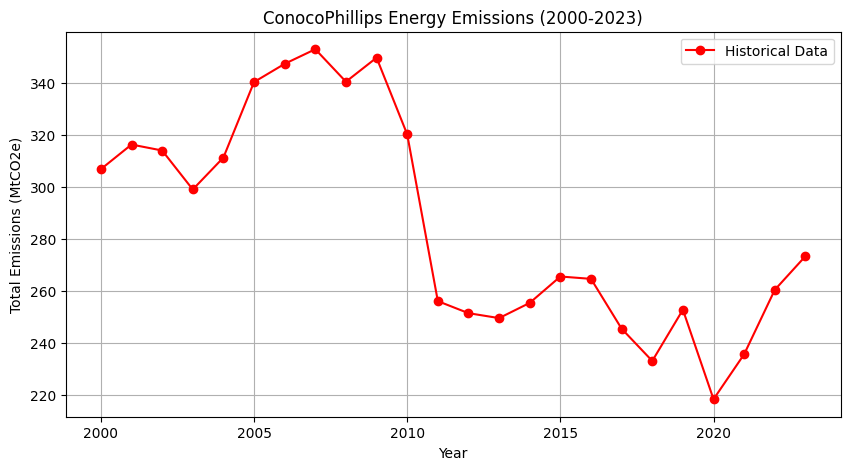

In [ ]:
# Filter for ConocoPhillips (2000-2023)
conoco_data = df[(df['parent_entity'] == "conocophillips") & (df['year'] >= 2000) & (df['year'] <= 2023)]
conoco_annual = conoco_data.groupby('year')['total_emissions_MtCO2e'].sum().reset_index()

# Plot historical emissions

plt.figure(figsize=(10, 5))
plt.plot(conoco_annual['year'], conoco_annual['total_emissions_MtCO2e'], marker="o", color="red", label="Historical Data")

plt.title("ConocoPhillips Energy Emissions (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Total Emissions (MtCO2e)")
plt.legend()
plt.grid(True)
plt.show()




/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


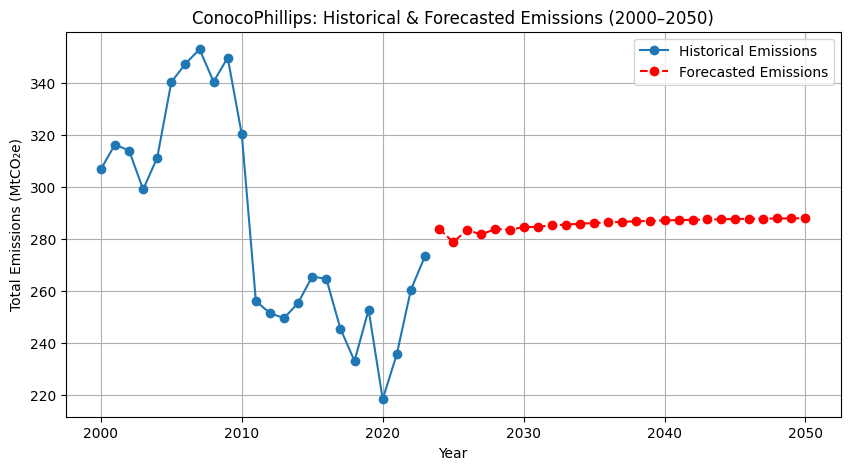

In [ ]:
# Fit ARIMA model (order=(1,1,1) for simplicity)
model = ARIMA(conoco_annual['total_emissions_MtCO2e'], order=(2,1,2))
model_fit = model.fit()

# Forecast for 2024-2050
forecast_years = np.arange(2024, 2051)
forecast_values = model_fit.forecast(steps=len(forecast_years))

# Convert to DataFrame
forecast_df = pd.DataFrame({'year': forecast_years, 'forecasted_emissions': forecast_values})

# Reset index for plotting
conoco_annual_reset = conoco_annual.reset_index()

# Plot historical and forecasted emissions
plt.figure(figsize=(10, 5))
plt.plot(conoco_annual_reset['year'], conoco_annual_reset['total_emissions_MtCO2e'], marker='o', label='Historical Emissions')
plt.plot(forecast_df['year'], forecast_df['forecasted_emissions'], marker='o', linestyle='dashed', color='red', label='Forecasted Emissions')

# Formatting
plt.title('ConocoPhillips: Historical & Forecasted Emissions (2000–2050)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO₂e)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Combine historical data (2000-2023) and forecasted data (2024-2050)
combined_df = pd.concat([conoco_annual.reset_index(), forecast_df], axis=0)

# Display the combined DataFrame (historical + forecasted)
print("Combined Historical and Forecasted Emissions:")
print(combined_df)

# For comparison, display just the historical values (2000-2023) vs forecasted (2024-2050)
historical_data = conoco_annual.reset_index()
historical_data = historical_data[historical_data['year'] <= 2023]
forecast_comparison_df = pd.concat([historical_data.set_index('year')['total_emissions_MtCO2e'],
                                    forecast_df.set_index('year')['forecasted_emissions']],
                                   axis=1)
forecast_comparison_df.columns = ['Historical Emissions (2000-2023)', 'Forecasted Emissions (2024-2050)']

# Display comparison data as sentences
print("\nComparison of Historical vs. Forecasted Emissions For ConocoPhillips:")

# Display and compare last historical value (2023) with first forecast value (2024)
historical_last_year = historical_data[historical_data['year'] == 2023]
forecast_first_year = forecast_df[forecast_df['year'] == 2024]
forecast_last_year = forecast_df[forecast_df['year'] == 2050]

print(f"\nLast historical emission in 2023: {historical_last_year['total_emissions_MtCO2e'].values[0]:.2f} MtCO2e")
print(f"First forecasted emission in 2024: {forecast_first_year['forecasted_emissions'].values[0]:.2f} MtCO2e")
print(f"Forecasted emission in 2050: {forecast_last_year['forecasted_emissions'].values[0]:.2f} MtCO2e")

# Compare the trend (for example: from the first historical value to the forecasted values in 2024)
historical_first_year = historical_data.iloc[0]
print(f"\nFirst historical emission in 2000: {historical_first_year['total_emissions_MtCO2e']:.2f} MtCO2e")


# Display the comparison as sentences for a few years
for i in range(2024, 2031):  # Compare first 7 years of forecast (2024-2030)
    historical_value = historical_data[historical_data['year'] == i]
    forecast_value = forecast_df[forecast_df['year'] == i]
    if not historical_value.empty:
        print(f"\nEmissions in {i}: Historical = {historical_value['total_emissions_MtCO2e'].values[0]:.2f} MtCO2e, "
              f"Forecasted = {forecast_value['forecasted_emissions'].values[0]:.2f} MtCO2e")



Combined Historical and Forecasted Emissions:
    index  year  total_emissions_MtCO2e  forecasted_emissions
0     0.0  2000              306.679102                   NaN
1     1.0  2001              316.149048                   NaN
2     2.0  2002              313.854850                   NaN
3     3.0  2003              298.860377                   NaN
4     4.0  2004              311.147339                   NaN
5     5.0  2005              340.187662                   NaN
6     6.0  2006              347.195814                   NaN
7     7.0  2007              352.810526                   NaN
8     8.0  2008              340.317820                   NaN
9     9.0  2009              349.550496                   NaN
10   10.0  2010              320.058551                   NaN
11   11.0  2011              255.922577                   NaN
12   12.0  2012              251.294112                   NaN
13   13.0  2013              249.395979                   NaN
14   14.0  2014         

In [ ]:
# --- Net-Zero Comparison ---
# Net-Zero Goal Assumption: 100% reduction by 2050
net_zero_target = 0  # Ideal target for 2050
emission_reduction_percentage_by_2030 = 50  # Assumed 50% reduction by 2030 for comparison
emission_reduction_percentage_by_2040 = 80  # Assumed 80% reduction by 2040

# Create a Net-Zero trajectory based on the assumptions
net_zero_trajectory = pd.DataFrame({
    'year': forecast_years,
    'net_zero_target': np.linspace(conoco_annual['total_emissions_MtCO2e'].iloc[-1], net_zero_target, len(forecast_years))
})

# Compare the projected emissions with the net-zero trajectory
comparison_df = pd.merge(forecast_df, net_zero_trajectory, on='year')

# Display and compare emissions with net-zero trajectory
print("\nComparison of Projected Emissions with Net-Zero Goal (2050 For ConocoPhillips):")
for year in comparison_df['year']:
    projected = comparison_df[comparison_df['year'] == year]['forecasted_emissions'].values[0]
    net_zero = comparison_df[comparison_df['year'] == year]['net_zero_target'].values[0]

    if projected > net_zero:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (Above Net-Zero Target)")
    elif projected == net_zero:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (On Target for Net-Zero)")
    else:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (Below Net-Zero Target)")


Comparison of Projected Emissions with Net-Zero Goal (2050 For ConocoPhillips):
Year 2024: Projected Emissions = 283.76 MtCO₂e, Net-Zero Target = 273.21 MtCO₂e (Above Net-Zero Target)
Year 2025: Projected Emissions = 278.66 MtCO₂e, Net-Zero Target = 262.70 MtCO₂e (Above Net-Zero Target)
Year 2026: Projected Emissions = 283.24 MtCO₂e, Net-Zero Target = 252.19 MtCO₂e (Above Net-Zero Target)
Year 2027: Projected Emissions = 281.58 MtCO₂e, Net-Zero Target = 241.68 MtCO₂e (Above Net-Zero Target)
Year 2028: Projected Emissions = 283.71 MtCO₂e, Net-Zero Target = 231.18 MtCO₂e (Above Net-Zero Target)
Year 2029: Projected Emissions = 283.33 MtCO₂e, Net-Zero Target = 220.67 MtCO₂e (Above Net-Zero Target)
Year 2030: Projected Emissions = 284.42 MtCO₂e, Net-Zero Target = 210.16 MtCO₂e (Above Net-Zero Target)
Year 2031: Projected Emissions = 284.49 MtCO₂e, Net-Zero Target = 199.65 MtCO₂e (Above Net-Zero Target)
Year 2032: Projected Emissions = 285.12 MtCO₂e, Net-Zero Target = 189.14 MtCO₂e (Above 

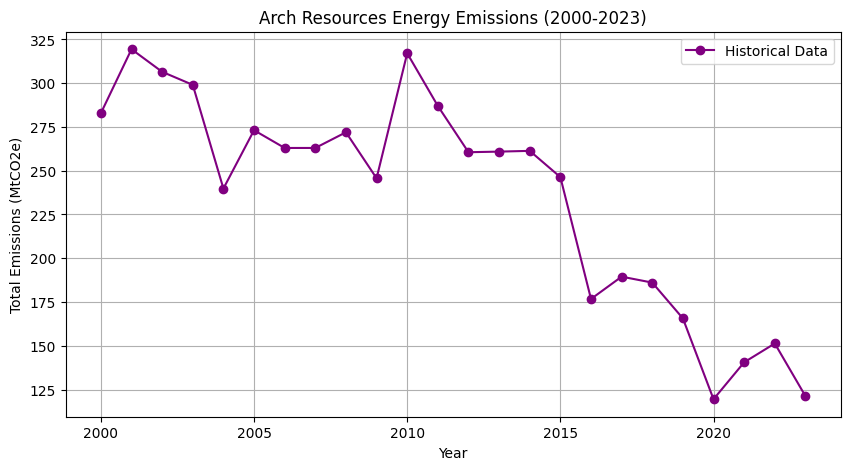

In [ ]:
#Filter for arch resources
arch_data = df[(df['parent_entity'] == "arch resources") & (df['year'] >= 2000) & (df['year'] <= 2023)]
arch_annual = arch_data.groupby('year')['total_emissions_MtCO2e'].sum().reset_index()

# Plot historical emissions
plt.figure(figsize=(10, 5))
plt.plot(arch_annual['year'], arch_annual['total_emissions_MtCO2e'], marker="o", color="Purple", label="Historical Data")

plt.title("Arch Resources Energy Emissions (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Total Emissions (MtCO2e)")
plt.legend()
plt.grid(True)
plt.show()





/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


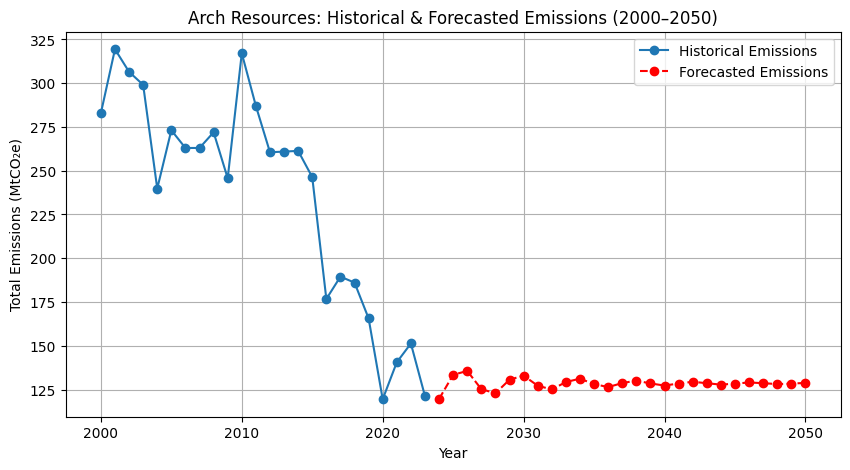

In [ ]:
# Fit ARIMA model (order=(1,1,1) for simplicity)
model = ARIMA(arch_annual['total_emissions_MtCO2e'], order=(2,1,2))
model_fit = model.fit()

# Forecast for 2024-2050
forecast_years = np.arange(2024, 2051)
forecast_values = model_fit.forecast(steps=len(forecast_years))

# Convert to DataFrame
forecast_df = pd.DataFrame({'year': forecast_years, 'forecasted_emissions': forecast_values})

# Reset index for plotting
arch_annual_reset = arch_annual.reset_index()

# Plot historical and forecasted emissions
plt.figure(figsize=(10, 5))
plt.plot(arch_annual_reset['year'], arch_annual_reset['total_emissions_MtCO2e'], marker='o', label='Historical Emissions')
plt.plot(forecast_df['year'], forecast_df['forecasted_emissions'], marker='o', linestyle='dashed', color='red', label='Forecasted Emissions')

# Formatting
plt.title('Arch Resources: Historical & Forecasted Emissions (2000–2050)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO₂e)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Combine historical data (2000-2023) and forecasted data (2024-2050)
combined_df = pd.concat([arch_annual.reset_index(), forecast_df], axis=0)

# Display the combined DataFrame (historical + forecasted)
print("Combined Historical and Forecasted Emissions:")
print(combined_df)

# For comparison, display just the historical values (2000-2023) vs forecasted (2024-2050)
historical_data = arch_annual.reset_index()
historical_data = historical_data[historical_data['year'] <= 2023]
forecast_comparison_df = pd.concat([historical_data.set_index('year')['total_emissions_MtCO2e'],
                                    forecast_df.set_index('year')['forecasted_emissions']],
                                   axis=1)
forecast_comparison_df.columns = ['Historical Emissions (2000-2023)', 'Forecasted Emissions (2024-2050)']

# Display comparison data as sentences
print("\nComparison of Historical vs. Forecasted Emissions For Arch Resources:")

# Display and compare last historical value (2023) with first forecast value (2024)
historical_last_year = historical_data[historical_data['year'] == 2023]
forecast_first_year = forecast_df[forecast_df['year'] == 2024]
forecast_last_year = forecast_df[forecast_df['year'] == 2050]

print(f"\nLast historical emission in 2023: {historical_last_year['total_emissions_MtCO2e'].values[0]:.2f} MtCO2e")
print(f"First forecasted emission in 2024: {forecast_first_year['forecasted_emissions'].values[0]:.2f} MtCO2e")
print(f"Forecasted emission in 2050: {forecast_last_year['forecasted_emissions'].values[0]:.2f} MtCO2e")

# Compare the trend (for example: from the first historical value to the forecasted values in 2024)
historical_first_year = historical_data.iloc[0]
print(f"\nFirst historical emission in 2000: {historical_first_year['total_emissions_MtCO2e']:.2f} MtCO2e")


# Display the comparison as sentences for a few years
for i in range(2024, 2031):  # Compare first 7 years of forecast (2024-2030)
    historical_value = historical_data[historical_data['year'] == i]
    forecast_value = forecast_df[forecast_df['year'] == i]
    if not historical_value.empty:
        print(f"\nEmissions in {i}: Historical = {historical_value['total_emissions_MtCO2e'].values[0]:.2f} MtCO2e, "
              f"Forecasted = {forecast_value['forecasted_emissions'].values[0]:.2f} MtCO2e")



Combined Historical and Forecasted Emissions:
    index  year  total_emissions_MtCO2e  forecasted_emissions
0     0.0  2000              282.851102                   NaN
1     1.0  2001              319.385334                   NaN
2     2.0  2002              306.477877                   NaN
3     3.0  2003              299.025618                   NaN
4     4.0  2004              239.804543                   NaN
5     5.0  2005              273.116140                   NaN
6     6.0  2006              262.986298                   NaN
7     7.0  2007              262.986298                   NaN
8     8.0  2008              271.947312                   NaN
9     9.0  2009              245.679851                   NaN
10   10.0  2010              317.069917                   NaN
11   11.0  2011              286.981005                   NaN
12   12.0  2012              260.551081                   NaN
13   13.0  2013              260.901760                   NaN
14   14.0  2014         

In [ ]:
# --- Net-Zero Comparison ---
# Net-Zero Goal Assumption: 100% reduction by 2050
net_zero_target = 0  # Ideal target for 2050
emission_reduction_percentage_by_2030 = 50  # Assumed 50% reduction by 2030 for comparison
emission_reduction_percentage_by_2040 = 80  # Assumed 80% reduction by 2040

# Create a Net-Zero trajectory based on the assumptions
net_zero_trajectory = pd.DataFrame({
    'year': forecast_years,
    'net_zero_target': np.linspace(arch_annual['total_emissions_MtCO2e'].iloc[-1], net_zero_target, len(forecast_years))
})

# Compare the projected emissions with the net-zero trajectory
comparison_df = pd.merge(forecast_df, net_zero_trajectory, on='year')

# Display and compare emissions with net-zero trajectory
print("\nComparison of Projected Emissions with Net-Zero Goal (2050 For ConocoPhillips):")
for year in comparison_df['year']:
    projected = comparison_df[comparison_df['year'] == year]['forecasted_emissions'].values[0]
    net_zero = comparison_df[comparison_df['year'] == year]['net_zero_target'].values[0]

    if projected > net_zero:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (Above Net-Zero Target)")
    elif projected == net_zero:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (On Target for Net-Zero)")
    else:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (Below Net-Zero Target)")


Comparison of Projected Emissions with Net-Zero Goal (2050 For ConocoPhillips):
Year 2024: Projected Emissions = 119.62 MtCO₂e, Net-Zero Target = 121.26 MtCO₂e (Below Net-Zero Target)
Year 2025: Projected Emissions = 133.44 MtCO₂e, Net-Zero Target = 116.60 MtCO₂e (Above Net-Zero Target)
Year 2026: Projected Emissions = 135.62 MtCO₂e, Net-Zero Target = 111.94 MtCO₂e (Above Net-Zero Target)
Year 2027: Projected Emissions = 125.23 MtCO₂e, Net-Zero Target = 107.27 MtCO₂e (Above Net-Zero Target)
Year 2028: Projected Emissions = 122.87 MtCO₂e, Net-Zero Target = 102.61 MtCO₂e (Above Net-Zero Target)
Year 2029: Projected Emissions = 130.64 MtCO₂e, Net-Zero Target = 97.94 MtCO₂e (Above Net-Zero Target)
Year 2030: Projected Emissions = 132.95 MtCO₂e, Net-Zero Target = 93.28 MtCO₂e (Above Net-Zero Target)
Year 2031: Projected Emissions = 127.18 MtCO₂e, Net-Zero Target = 88.62 MtCO₂e (Above Net-Zero Target)
Year 2032: Projected Emissions = 125.03 MtCO₂e, Net-Zero Target = 83.95 MtCO₂e (Above Net-

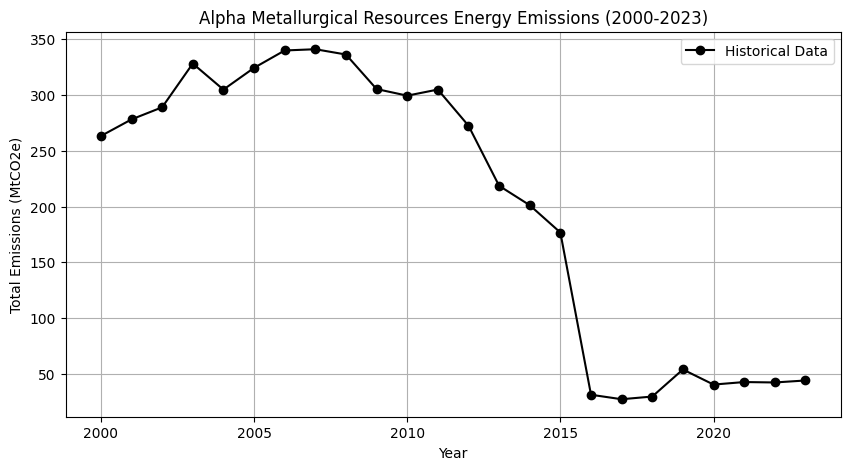

In [ ]:
#Filter for alpha metallurgical resources
alpha_data = df[(df['parent_entity'] == "alpha metallurgical resources") & (df['year'] >= 2000) & (df['year'] <= 2023)]
alpha_annual = alpha_data.groupby('year')['total_emissions_MtCO2e'].sum().reset_index()

# Plot historical emissions
plt.figure(figsize=(10, 5))
plt.plot(alpha_annual['year'], alpha_annual['total_emissions_MtCO2e'], marker="o", color="black", label="Historical Data")

plt.title("Alpha Metallurgical Resources Energy Emissions (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Total Emissions (MtCO2e)")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


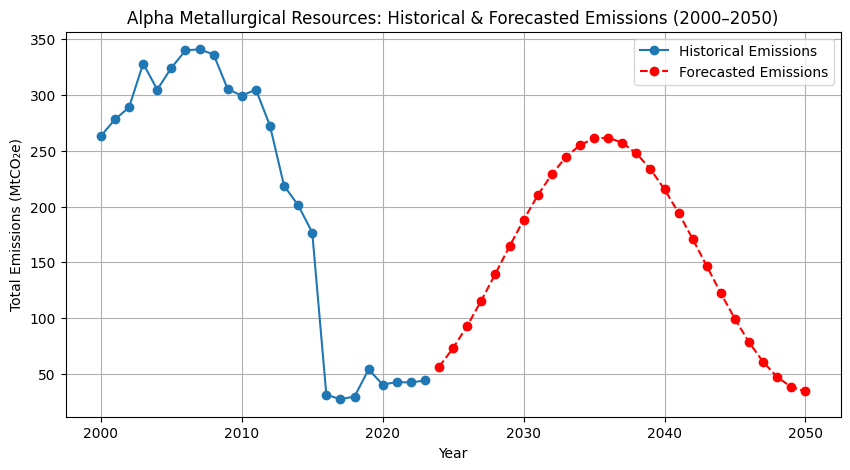

In [ ]:
# Fit ARIMA model (order=(1,1,1) for simplicity)
model = ARIMA(alpha_annual['total_emissions_MtCO2e'], order=(2,1,2))
model_fit = model.fit()

# Forecast for 2024-2050
forecast_years = np.arange(2024, 2051)
forecast_values = model_fit.forecast(steps=len(forecast_years))

# Convert to DataFrame
forecast_df = pd.DataFrame({'year': forecast_years, 'forecasted_emissions': forecast_values})

# Reset index for plotting
alpha_annual_reset = alpha_annual.reset_index()

# Plot historical and forecasted emissions
plt.figure(figsize=(10, 5))
plt.plot(alpha_annual_reset['year'], alpha_annual_reset['total_emissions_MtCO2e'], marker='o', label='Historical Emissions')
plt.plot(forecast_df['year'], forecast_df['forecasted_emissions'], marker='o', linestyle='dashed', color='red', label='Forecasted Emissions')

# Formatting
plt.title('Alpha Metallurgical Resources: Historical & Forecasted Emissions (2000–2050)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO₂e)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Combine historical data (2000-2023) and forecasted data (2024-2050)
combined_df = pd.concat([alpha_annual.reset_index(), forecast_df], axis=0)

# Display the combined DataFrame (historical + forecasted)
print("Combined Historical and Forecasted Emissions:")
print(combined_df)

# For comparison, display just the historical values (2000-2023) vs forecasted (2024-2050)
historical_data = alpha_annual.reset_index()
historical_data = historical_data[historical_data['year'] <= 2023]
forecast_comparison_df = pd.concat([historical_data.set_index('year')['total_emissions_MtCO2e'],
                                    forecast_df.set_index('year')['forecasted_emissions']],
                                   axis=1)
forecast_comparison_df.columns = ['Historical Emissions (2000-2023)', 'Forecasted Emissions (2024-2050)']

# Display comparison data as sentences
print("\nComparison of Historical vs. Forecasted Emissions For Arch Resources:")

# Display and compare last historical value (2023) with first forecast value (2024)
historical_last_year = historical_data[historical_data['year'] == 2023]
forecast_first_year = forecast_df[forecast_df['year'] == 2024]
forecast_last_year = forecast_df[forecast_df['year'] == 2050]

print(f"\nLast historical emission in 2023: {historical_last_year['total_emissions_MtCO2e'].values[0]:.2f} MtCO2e")
print(f"First forecasted emission in 2024: {forecast_first_year['forecasted_emissions'].values[0]:.2f} MtCO2e")
print(f"Forecasted emission in 2050: {forecast_last_year['forecasted_emissions'].values[0]:.2f} MtCO2e")

# Compare the trend (for example: from the first historical value to the forecasted values in 2024)
historical_first_year = historical_data.iloc[0]
print(f"\nFirst historical emission in 2000: {historical_first_year['total_emissions_MtCO2e']:.2f} MtCO2e")


# Display the comparison as sentences for a few years
for i in range(2024, 2031):  # Compare first 7 years of forecast (2024-2030)
    historical_value = historical_data[historical_data['year'] == i]
    forecast_value = forecast_df[forecast_df['year'] == i]
    if not historical_value.empty:
        print(f"\nEmissions in {i}: Historical = {historical_value['total_emissions_MtCO2e'].values[0]:.2f} MtCO2e, "
              f"Forecasted = {forecast_value['forecasted_emissions'].values[0]:.2f} MtCO2e")

Combined Historical and Forecasted Emissions:
    index  year  total_emissions_MtCO2e  forecasted_emissions
0     0.0  2000              263.284801                   NaN
1     1.0  2001              278.175488                   NaN
2     2.0  2002              289.036534                   NaN
3     3.0  2003              328.286622                   NaN
4     4.0  2004              304.905638                   NaN
5     5.0  2005              324.414098                   NaN
6     6.0  2006              340.012203                   NaN
7     7.0  2007              341.138387                   NaN
8     8.0  2008              336.386926                   NaN
9     9.0  2009              305.398644                   NaN
10   10.0  2010              299.470427                   NaN
11   11.0  2011              304.951190                   NaN
12   12.0  2012              272.542530                   NaN
13   13.0  2013              218.610992                   NaN
14   14.0  2014         

In [ ]:
# --- Net-Zero Comparison ---
# Net-Zero Goal Assumption: 100% reduction by 2050
net_zero_target = 0  # Ideal target for 2050
emission_reduction_percentage_by_2030 = 50  # Assumed 50% reduction by 2030 for comparison
emission_reduction_percentage_by_2040 = 80  # Assumed 80% reduction by 2040

# Create a Net-Zero trajectory based on the assumptions
net_zero_trajectory = pd.DataFrame({
    'year': forecast_years,
    'net_zero_target': np.linspace(alpha_annual['total_emissions_MtCO2e'].iloc[-1], net_zero_target, len(forecast_years))
})

# Compare the projected emissions with the net-zero trajectory
comparison_df = pd.merge(forecast_df, net_zero_trajectory, on='year')

# Display and compare emissions with net-zero trajectory
print("\nComparison of Projected Emissions with Net-Zero Goal (2050 For ConocoPhillips):")
for year in comparison_df['year']:
    projected = comparison_df[comparison_df['year'] == year]['forecasted_emissions'].values[0]
    net_zero = comparison_df[comparison_df['year'] == year]['net_zero_target'].values[0]

    if projected > net_zero:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (Above Net-Zero Target)")
    elif projected == net_zero:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (On Target for Net-Zero)")
    else:
        print(f"Year {year}: Projected Emissions = {projected:.2f} MtCO₂e, "
              f"Net-Zero Target = {net_zero:.2f} MtCO₂e (Below Net-Zero Target)")


Comparison of Projected Emissions with Net-Zero Goal (2050 For ConocoPhillips):
Year 2024: Projected Emissions = 56.31 MtCO₂e, Net-Zero Target = 43.92 MtCO₂e (Above Net-Zero Target)
Year 2025: Projected Emissions = 72.93 MtCO₂e, Net-Zero Target = 42.23 MtCO₂e (Above Net-Zero Target)
Year 2026: Projected Emissions = 93.02 MtCO₂e, Net-Zero Target = 40.54 MtCO₂e (Above Net-Zero Target)
Year 2027: Projected Emissions = 115.65 MtCO₂e, Net-Zero Target = 38.85 MtCO₂e (Above Net-Zero Target)
Year 2028: Projected Emissions = 139.77 MtCO₂e, Net-Zero Target = 37.16 MtCO₂e (Above Net-Zero Target)
Year 2029: Projected Emissions = 164.27 MtCO₂e, Net-Zero Target = 35.47 MtCO₂e (Above Net-Zero Target)
Year 2030: Projected Emissions = 188.02 MtCO₂e, Net-Zero Target = 33.78 MtCO₂e (Above Net-Zero Target)
Year 2031: Projected Emissions = 209.93 MtCO₂e, Net-Zero Target = 32.09 MtCO₂e (Above Net-Zero Target)
Year 2032: Projected Emissions = 228.98 MtCO₂e, Net-Zero Target = 30.40 MtCO₂e (Above Net-Zero Tar